# Linguagem, Bibliotecas e Pacotes

In [1]:
#Import libs

import numpy as np
import pandas as pd
import missingno as msno
from pandas_profiling import ProfileReport


c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\arthu\AppData\Local\Temp\ipykernel_15660\2882942237.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Leitura dos Dados

In [2]:
#Read NBA data from excel file

nba_data = pd.read_excel('nba_data.xlsx')

In [3]:
#Drop "Unnamed: 0" column

nba_data.drop(['Unnamed: 0'], axis=1, inplace=True)
nba_data.head()

,HOME_WL,GP_x,W_x,L_x,W_PCT_x,MIN_x,FGM_x,FGA_x,FG_PCT_x,FG3M_x,...,REB_RANK_y,AST_RANK_y,TOV_RANK_y,STL_RANK_y,BLK_RANK_y,BLKA_RANK_y,PF_RANK_y,PFD_RANK_y,PTS_RANK_y,PLUS_MINUS_RANK_y
0,W,1,1,0,1.000,48.0,42.0,92.0,0.457,11.0,...,12,15,14,2,6,2,25,8,8,7
1,W,2,1,1,0.500,48.0,43.0,81.0,0.531,13.0,...,10,17,24,21,2,7,7,27,18,9
2,W,3,2,1,0.667,49.7,42.0,86.3,0.486,11.0,...,8,9,9,14,28,30,10,7,17,27
3,L,4,3,1,0.750,49.3,42.5,86.0,0.494,10.8,...,9,7,16,26,3,21,23,17,11,25
4,W,5,3,2,0.600,49.0,41.6,86.0,0.484,15.2,...,24,14,23,21,5,7,19,23,20,11


# Análise Inicial

In [4]:
#Get nba_data dataframa shape

nba_data.shape

(6963, 105)

In [5]:
#Get nba_data dataframe columns

nba_data.columns

Index(['HOME_WL', 'GP_x', 'W_x', 'L_x', 'W_PCT_x', 'MIN_x', 'FGM_x', 'FGA_x',
       'FG_PCT_x', 'FG3M_x',
       ...
       'REB_RANK_y', 'AST_RANK_y', 'TOV_RANK_y', 'STL_RANK_y', 'BLK_RANK_y',
       'BLKA_RANK_y', 'PF_RANK_y', 'PFD_RANK_y', 'PTS_RANK_y',
       'PLUS_MINUS_RANK_y'],
      dtype='object', length=105)

In [6]:
#Get nba_data dataframe describe

nba_data.describe()

,GP_x,W_x,L_x,W_PCT_x,MIN_x,FGM_x,FGA_x,FG_PCT_x,FG3M_x,FG3A_x,...,REB_RANK_y,AST_RANK_y,TOV_RANK_y,STL_RANK_y,BLK_RANK_y,BLKA_RANK_y,PF_RANK_y,PFD_RANK_y,PTS_RANK_y,PLUS_MINUS_RANK_y
count,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,...,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000
mean,39.421657,19.688640,19.733017,0.498711,48.315712,40.513055,88.108358,0.459894,11.760606,33.007928,...,15.370243,15.345541,15.321844,15.419647,15.286514,15.244004,15.371248,15.439466,15.327876,15.286227
std,22.634354,13.039842,13.080083,0.173915,0.367160,2.042301,3.016847,0.019334,1.826029,4.643194,...,8.632790,8.664255,8.648501,8.662756,8.643116,8.639085,8.656732,8.616650,8.637555,8.633215
min,1.000000,0.000000,0.000000,0.000000,48.000000,25.000000,73.000000,0.298000,4.500000,16.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,20.000000,9.000000,9.000000,0.390000,48.100000,39.100000,86.100000,0.448000,10.600000,30.100000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,39.000000,18.000000,18.000000,0.500000,48.300000,40.500000,88.000000,0.461000,11.600000,32.800000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16.000000,15.000000,15.000000
75%,59.000000,29.000000,29.000000,0.613000,48.400000,41.900000,90.000000,0.472000,12.800000,35.850000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
max,81.000000,64.000000,64.000000,1.000000,58.000000,54.000000,117.000000,0.560000,23.000000,57.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000


In [7]:
#Get nba_data dataframe info

nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6963 entries, 0 to 6962
Columns: 105 entries, HOME_WL to PLUS_MINUS_RANK_y
dtypes: float64(46), int64(58), object(1)
memory usage: 5.6+ MB


# Chegagem de valores nulos

<Axes: >

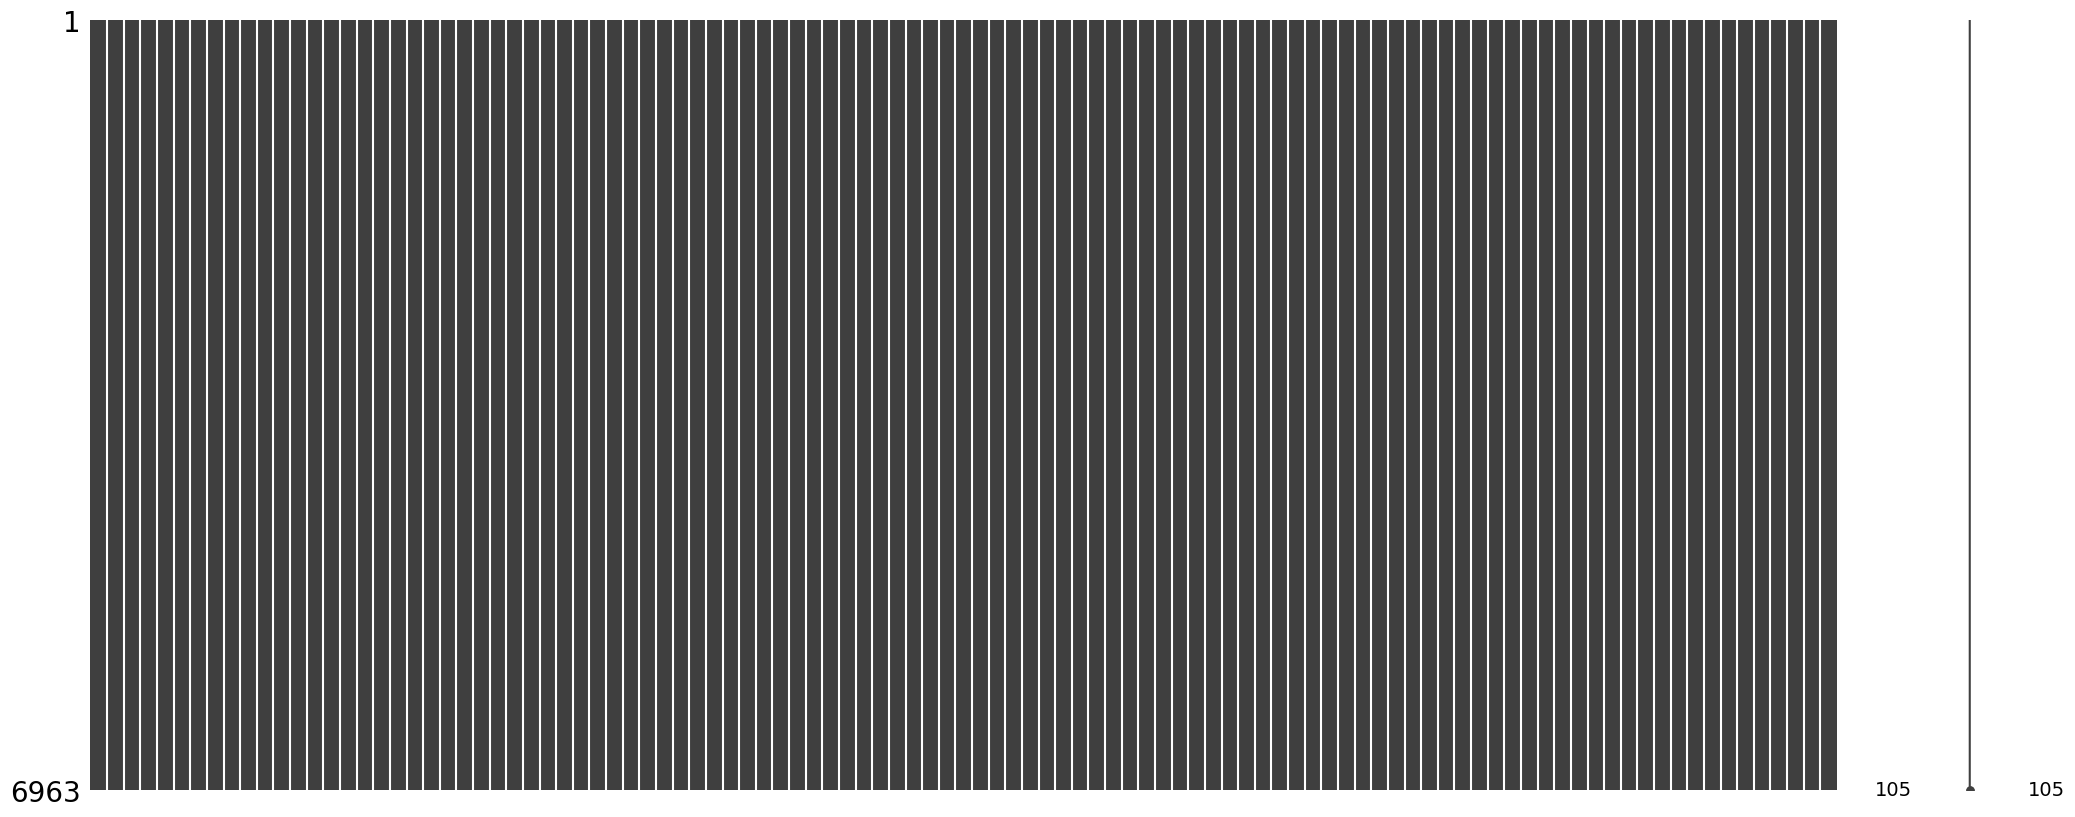

In [8]:
msno.matrix(nba_data)

# Relatório Pandas Profile

    Foi gerado o 'Pandas Profile Report' que oferece uma análise extensa do conjunto de dados que está sendo abordado.

In [9]:
#Generate and export as a .html file the Pandas Profile Report of the nba_shots dataframe

profile_data = ProfileReport(nba_data, title ='nba_data')
profile_data.to_file("nba_data_pandas_profile_report.html")

Summarize dataset: 100%|█████████▉| 10927/10930 [23:44<00:01,  2.61it/s, Detecting duplicates]                        c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return func(*args, **kwargs)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  return func(*args, **kwargs)
c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\sit

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\arthu\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\arthu\AppData\Local\Temp\ipykernel_15660\4262361495.py", line 4, in <module>
    profile_data.to_file("nba_data_pandas_profile_report.html")
  File "c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\typeguard\__init__.py", line 1033, in wrapper
    retval = func(*args, **kwargs)
  File "c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_profiling\profile_report.py", line 309, in to_file
    data = self.to_html()
  File "c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\typeguard\__init__.py", line 1033, in wrapper
    retval = func(*args, **kwargs)
  File "c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_profiling\profile_report.py", line 420, in to_ht

Error in callback <function _draw_all_if_interactive at 0x000002B3302CC670> (for post_execute):


In [ ]:
#Show Profile Report in this notebook

profile_data.to_notebook_iframe()